# 📊 Proyecto Guiado - Análisis de Ventas de Videojuegos
## Parte 3: Limpieza y Preparación de Datos

---

### 🎯 Objetivos de este notebook:
1. Limpiar valores nulos y decidir estrategias de imputación
2. Tratar outliers y valores anómalos
3. Crear nuevas variables (feature engineering)
4. Transformar y categorizar datos
5. Exportar dataset limpio para la aplicación

---

### 📚 ¿Por qué limpiar los datos?

Los datos del mundo real son **sucios**:
- Valores faltantes
- Errores de entrada
- Inconsistencias
- Outliers que distorsionan análisis

**Un buen análisis requiere datos limpios.**

---
## 1. Cargar librerías y datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones

# Cargar dataset original
datos = pd.read_csv('vgsales.csv')


---
## 2. Tratamiento de Valores Nulos

### 2.1 Identificar valores nulos

In [5]:
# Análisis detallado de nulos

datos.info()

# Visualizar filas con nulos
nulos = datos[datos.isnull().any(axis=1)]
nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


### 2.2 Estrategias para manejar nulos

**Opciones:**
1. **Eliminar** filas/columnas (si son pocos)
2. **Imputar** con media/mediana/moda
3. **Rellenar** con valor específico (ej: 'Unknown')
4. **Predecir** usando otros datos

**Nuestra estrategia:**
- **Year**: Intentar inferir del contexto, si no es posible → eliminar
- **Publisher**: Rellenar con 'Unknown'

In [28]:
# Crear copia para trabajar
df_clean = datos.copy()

# 1. Tratar Publisher nulos

df_clean.fillna({'Publisher': 'Unknown'}, inplace=True)
# 2. Tratar Year nulos

df_clean.fillna({'Year': df_clean['Year'].median()}, inplace=True)
df_clean.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


---
## 3. Análisis y Tratamiento de Outliers

### 3.1 ¿Qué son los outliers?

**Outliers** son valores atípicos que se desvían significativamente del resto.



In [35]:
# Identificar outliers usando IQR (Rango Intercuartílico)

Q1 = df_clean['Global_Sales'].quantile(0.25)
Q3 = df_clean['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')

# Analizar outliers en Global_Sales

outliers = df_clean[(df_clean['Global_Sales'] < (Q1 - 1.5 * IQR)) | (df_clean['Global_Sales'] > (Q3 + 1.5 * IQR))]

# Mostrar los outliers superiores (juegos más vendidos)

outliers_sorted = outliers.sort_values(by='Global_Sales', ascending=False)
outliers_sorted.head(10)


Q1: 0.06, Q3: 0.47, IQR: 0.41


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


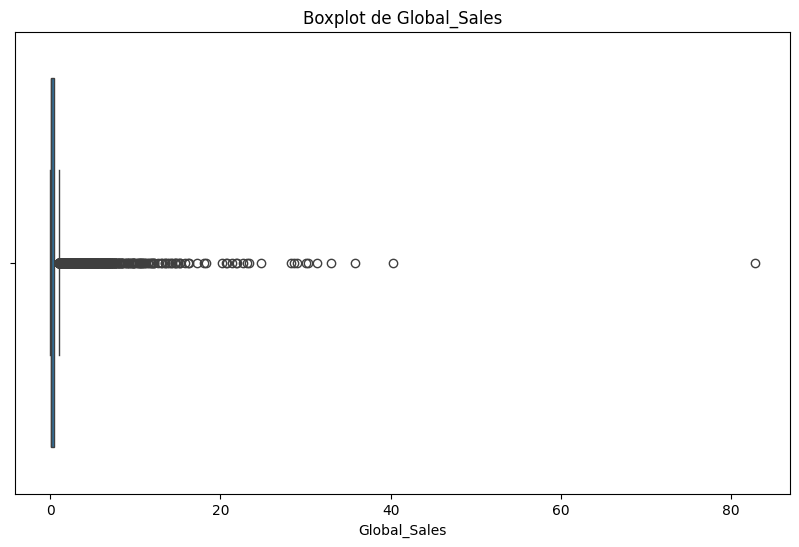

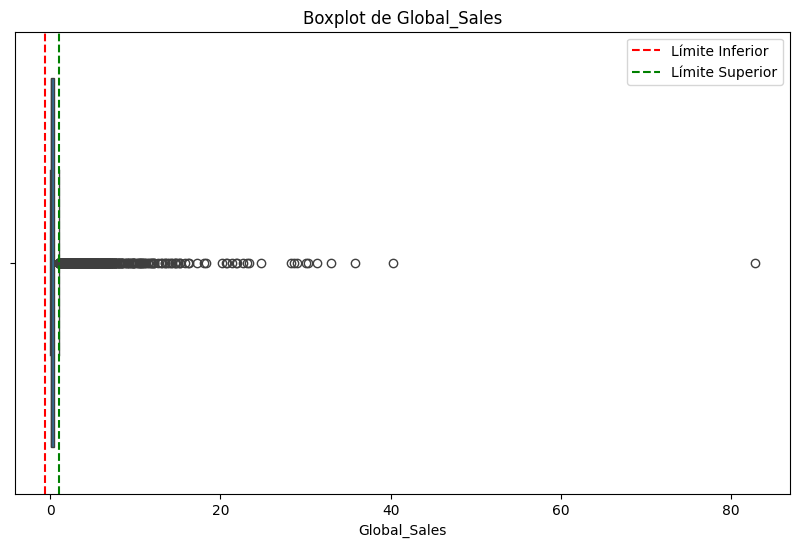

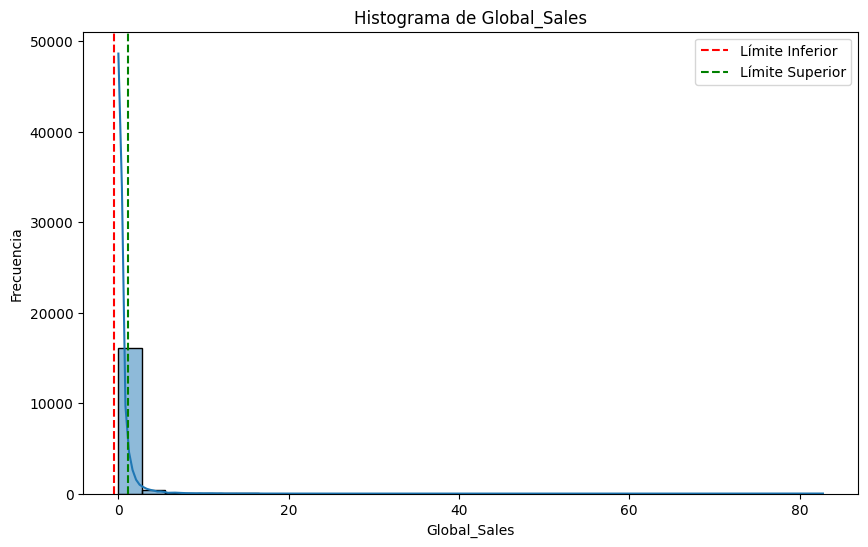

In [37]:
# Visualización de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Global_Sales'])
plt.title('Boxplot de Global_Sales')
plt.xlabel('Global_Sales')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Global_Sales'])
plt.title('Boxplot de Global_Sales')
plt.xlabel('Global_Sales')
plt.axvline(Q1 - 1.5 * IQR, color='r', linestyle='--', label='Límite Inferior')
plt.axvline(Q3 + 1.5 * IQR, color='g', linestyle='--', label='Límite Superior')
plt.legend()
plt.show()


# Histograma con líneas de límites

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Global_Sales'], bins=30, kde=True)
plt.title('Histograma de Global_Sales')
plt.xlabel('Global_Sales')
plt.ylabel('Frecuencia')
plt.axvline(Q1 - 1.5 * IQR, color='r', linestyle='--', label='Límite Inferior')
plt.axvline(Q3 + 1.5 * IQR, color='g', linestyle='--', label='Límite Superior')
plt.legend()
plt.show()


---
## 4. Feature Engineering - Crear Nuevas Variables

Vamos a crear variables nuevas que nos ayuden en el análisis.

### 4.1 Década de lanzamiento

In [38]:
# Crear columna de década

df_clean['Decade'] = (df_clean['Year'] // 10) * 10
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990.0


### 4.2 Categoría de ventas (bajo, medio, alto, mega-éxito)

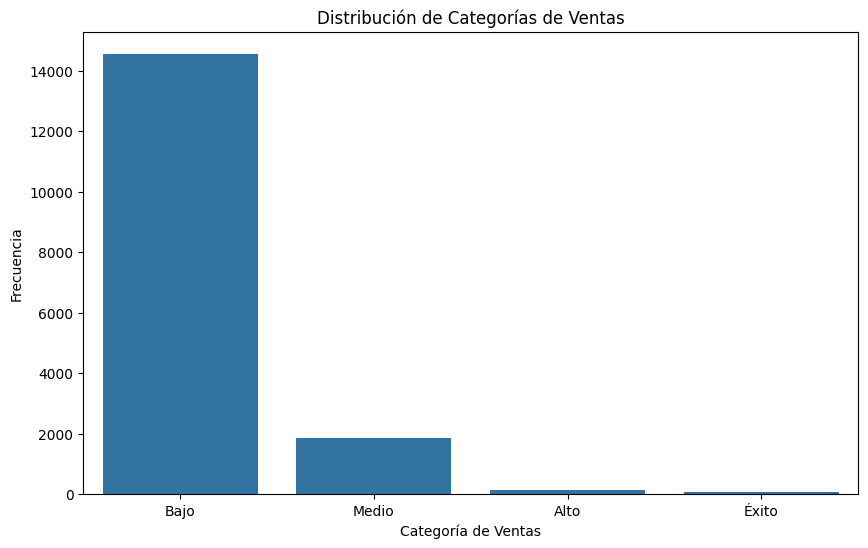

In [41]:
# Categorizar ventas

df_clean['Sales_Category'] = pd.cut(df_clean['Global_Sales'], bins=[0, 1, 5, 10, np.inf], labels=['Bajo', 'Medio', 'Alto', 'Éxito'])
# Visualización
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Sales_Category')
plt.title('Distribución de Categorías de Ventas')
plt.xlabel('Categoría de Ventas')
plt.ylabel('Frecuencia')
plt.show()

### 4.3 Región dominante (dónde vende más)

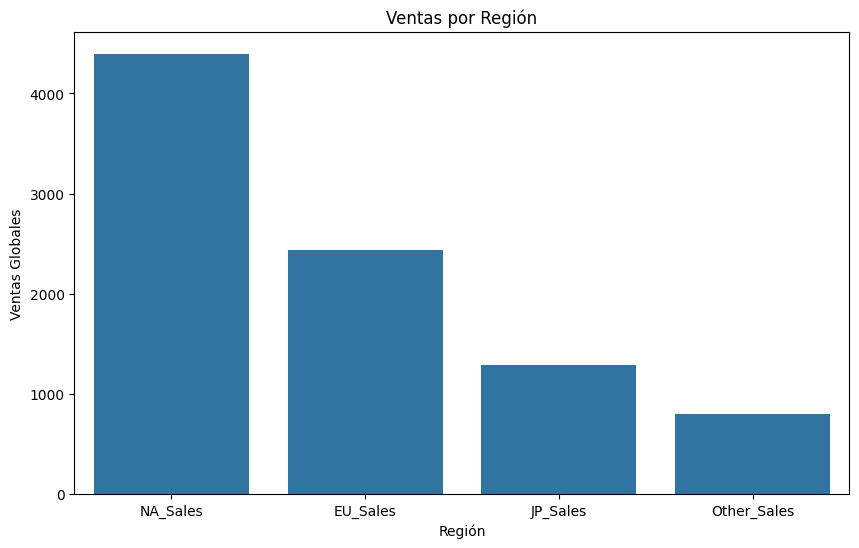

In [42]:
# Identificar región con mayores ventas
df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().idxmax()

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().index,
                      y=df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().values)
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Globales')
plt.show()


### 4.4 Porcentaje de ventas por región

In [45]:
# Calcular porcentajes de ventas por región
df_clean['Total_Sales'] = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df_clean['NA_Percent'] = (df_clean['NA_Sales'] / df_clean['Total_Sales']) * 100
df_clean['EU_Percent'] = (df_clean['EU_Sales'] / df_clean['Total_Sales']) * 100
df_clean['JP_Percent'] = (df_clean['JP_Sales'] / df_clean['Total_Sales']) * 100
df_clean['Other_Percent'] = (df_clean['Other_Sales'] / df_clean['Total_Sales']) * 100
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Sales_Category,Total_Sales,NA_Percent,EU_Percent,JP_Percent,Other_Percent
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000.0,Éxito,82.74,50.145033,35.073725,4.556442,10.224801
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980.0,Éxito,40.24,72.266402,8.896620,16.923459,1.913519
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000.0,Éxito,35.83,44.236673,35.947530,10.577728,9.238069
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000.0,Éxito,33.00,47.727273,33.363636,9.939394,8.969697
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990.0,Éxito,31.38,35.914595,28.330147,32.568515,3.186743


### 4.5 Tipo de plataforma (Consola, Portátil, PC)

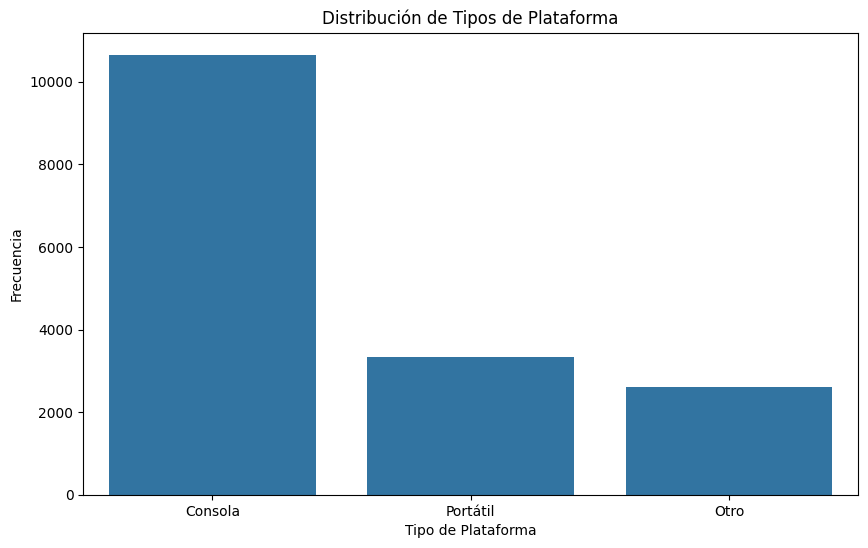

In [47]:
# Clasificar plataformas por tipo

df_clean['Platform_Type'] = df_clean['Platform'].apply(lambda x: 'Consola' if x in ['PS4', 'XOne', 'PS3', 'X360', 'WiiU', 'Wii', 'PS2', 'DS', '3DS', 'PSP'] else 'Portátil' if x in ['GBA', 'GB', 'NES', 'SNES', 'N64', 'GC', 'PS'] else 'Otro')
df_clean.head()

# Visualización

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Platform_Type')
plt.title('Distribución de Tipos de Plataforma')
plt.xlabel('Tipo de Plataforma')
plt.ylabel('Frecuencia')
plt.show()


---
## 5. Verificación Final del Dataset Limpio

In [48]:
# Resumen final del dataset limpio
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Rank            16598 non-null  int64   
 1   Name            16598 non-null  object  
 2   Platform        16598 non-null  object  
 3   Year            16598 non-null  float64 
 4   Genre           16598 non-null  object  
 5   Publisher       16598 non-null  object  
 6   NA_Sales        16598 non-null  float64 
 7   EU_Sales        16598 non-null  float64 
 8   JP_Sales        16598 non-null  float64 
 9   Other_Sales     16598 non-null  float64 
 10  Global_Sales    16598 non-null  float64 
 11  Decade          16598 non-null  float64 
 12  Sales_Category  16598 non-null  category
 13  Total_Sales     16598 non-null  float64 
 14  NA_Percent      16597 non-null  float64 
 15  EU_Percent      16597 non-null  float64 
 16  JP_Percent      16597 non-null  float64 
 17  Other_Percen

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Sales_Category,Total_Sales,NA_Percent,EU_Percent,JP_Percent,Other_Percent,Platform_Type
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000.0,Éxito,82.74,50.145033,35.073725,4.556442,10.224801,Consola
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980.0,Éxito,40.24,72.266402,8.896620,16.923459,1.913519,Portátil
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000.0,Éxito,35.83,44.236673,35.947530,10.577728,9.238069,Consola
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000.0,Éxito,33.00,47.727273,33.363636,9.939394,8.969697,Consola
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990.0,Éxito,31.38,35.914595,28.330147,32.568515,3.186743,Portátil


In [49]:
# Vista general del dataset limpio
df_clean.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Total_Sales,NA_Percent,EU_Percent,JP_Percent,Other_Percent
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441,2001.787565,0.537164,46.158018,23.198464,24.244149,6.399369
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028,6.589482,1.555151,34.605890,25.433605,40.180598,7.819596
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,2000.000000,0.060000,0.000000,0.000000,0.000000,0.000000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,2000.000000,0.170000,50.000000,20.000000,0.000000,5.555556
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000,2010.000000,0.470000,75.000000,37.500000,35.000000,10.000000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,2020.000000,82.740000,100.000000,100.000000,100.000000,100.000000


---
## 6. Exportar Dataset Limpio

Guardamos el dataset procesado para usarlo en:
1. Análisis avanzados
2. Aplicación web con Streamlit
3. Futuros proyectos

In [50]:
# Exportar dataset limpio

df_clean.to_csv('vgsales_clean.csv', index=False)

# Verificar que se guardó correctamente
df_clean_loaded = pd.read_csv('vgsales_clean.csv')